In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/CS550/GANFingerprints-master/

/content/drive/.shortcut-targets-by-id/1oE8U0pU-coSldw8OMDE7dzHH0664tLkj/CS550/GANFingerprints-master


In [ ]:
cd classifier_visNet/

/content/drive/.shortcut-targets-by-id/1oE8U0pU-coSldw8OMDE7dzHH0664tLkj/CS550/GANFingerprints-master/classifier_visNet


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import sys
from PIL import Image

In [ ]:
import json
with open('result') as filehandle:
  data = json.load(filehandle)

In [ ]:
data.keys()

dict_keys(['progan_original', 'progan_originalvalues', 'progan_sr', 'progan_srvalues', 'sngan_original', 'sngan_originalvalues', 'sngan_sr', 'sngan_srvalues', 'progan_3x_interpolation', 'progan_3x_interpolationvalues', 'sngan_3x_interpolation', 'sngan_3x_interpolationvalues'])

# **ProGAN analysis pre and post super resolution**

In [ ]:
def prob_diff(ori,sr,ori_val,sr_val):
  
  diff = []
  gan_dict = {'CelebA':0, 'ProGAN':1, 'SNGAN':2, 'CramerGAN':3,'MMDGAN':4}
  
  for i in range(len(ori)):
    gan = ori[i].split('_')[0]
    gan_sr = sr[i].split('_')[0]

    if(gan == gan_sr):
      diff.append(sr_val[i][gan_dict[gan]] - ori_val[i][gan_dict[gan]])

  return diff


In [ ]:
pro_ori = data['progan_original']
pro_sr = data['progan_sr']
pro_ori_val = data['progan_originalvalues']
pro_sr_val = data['progan_srvalues']


In [ ]:
pro_ori[0]

'ProGAN_generated_data'

In [ ]:
diff_sr = np.array(prob_diff(pro_ori,pro_sr,pro_ori_val,pro_sr_val))

In [ ]:
print(diff_sr.mean())
print(diff_sr.var())


1.20244
0.6337686184


## **Interpolation version**

In [ ]:
pro_sr_inter = data['progan_3x_interpolation']
pro_sr_inter_val = data['progan_3x_interpolationvalues']

In [ ]:
pro_sr_inter[0]

'ProGAN_generated_data'

In [ ]:
diff_inter = np.array(prob_diff(pro_ori,pro_sr_inter,pro_ori_val,pro_sr_inter_val))

In [ ]:
print(diff_inter.mean())
print(diff_inter.var())


-1.9681141141141143
1.218072949940932


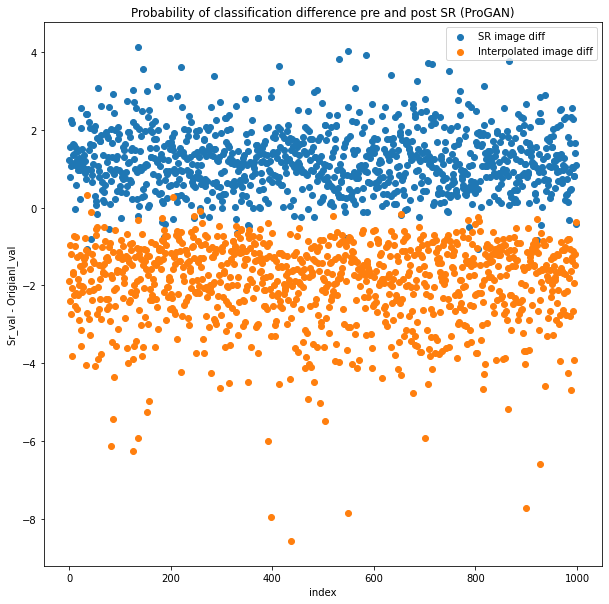

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter([x for x in range(len(diff_sr))], diff_sr, label = 'SR image diff')
plt.scatter([x for x in range(len(diff_inter))], diff_inter, label = 'Interpolated image diff')
plt.title('Probability of classification difference pre and post SR (ProGAN)')
plt.xlabel('index')
plt.ylabel('Sr_val - Origianl_val')
plt.legend()
plt.show()

# **SNGAN analysis pre and post super resolution**

In [ ]:
sn_ori = data['sngan_original']
sn_sr = data['sngan_sr']
sn_ori_val = data['sngan_originalvalues']
sn_sr_val = data['sngan_srvalues']


In [ ]:
sn_ori[0]

'SNGAN_generated_data'

In [ ]:
diff_sr = np.array(prob_diff(sn_ori,sn_sr,sn_ori_val,sn_sr_val))

In [ ]:
print(diff_sr.mean())
print(diff_sr.var())


2.6475105105105103
1.8900783840236632


## **Interpolation version**

In [ ]:
sn_sr_inter = data['sngan_3x_interpolation']
sn_sr_inter_val = data['sngan_3x_interpolationvalues']

In [ ]:
sn_sr_inter[0]

'SNGAN_generated_data'

In [ ]:
diff_inter = np.array(prob_diff(sn_ori,sn_sr_inter,sn_ori_val,sn_sr_inter_val))

In [ ]:
print(diff_inter.mean())
print(diff_inter.var())


-4.15486960882648
5.581559511583899


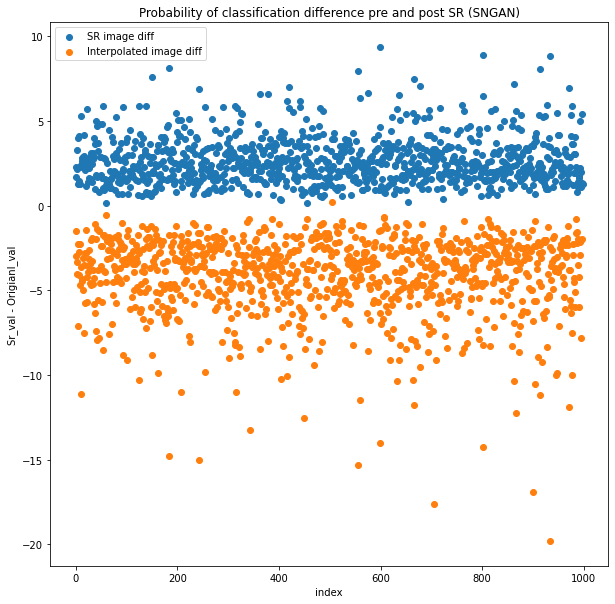

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter([x for x in range(len(diff_sr))], diff_sr, label = 'SR image diff')
plt.scatter([x for x in range(len(diff_inter))], diff_inter, label = 'Interpolated image diff')
plt.title('Probability of classification difference pre and post SR (SNGAN)')
plt.xlabel('index')
plt.ylabel('Sr_val - Origianl_val')
plt.legend()
plt.show()

In [ ]:
# plt.figure(figsize = (10,10))
# plt.scatter([x for x in range(len(diff))], diff)
# plt.title('Probability of classification difference pre and post SR (SNGAN)')
# plt.xlabel('index')
# plt.ylabel('Sr_val - Origianl_val')
# plt.show()

# **Fingerprint analysis**

## **ProGAN**

In [ ]:
model_gan = [im for im in os.listdir('fingerprint/progan_original') if im.split('_')[0] == 'model']
progan_ori = [im for im in os.listdir('fingerprint/progan_original') if (im.split('_')[0] == 'ProGAN' and im.split('_')[-3] == 'ProGAN' and \
            im.split('_')[4] == 'responding')]
progan_sr = [im for im in os.listdir('fingerprint/progan_sr') if (im.split('_')[0] == 'ProGAN' and im.split('_')[-3] == 'ProGAN' and \
            im.split('_')[6] == 'responding')]


progan_ori.sort()
progan_sr.sort()
model_gan.sort()

In [ ]:
print(progan_ori[0])
print(progan_sr)

path_ori = 'fingerprint/progan_original/'
path_sr = 'fingerprint/progan_sr/'

ProGAN_00000000_image_fingerprint_responding_to_model_fingerprint_ProGAN_generated_data.png
['ProGAN_00000000_sr_3x_image_fingerprint_responding_to_model_fingerprint_ProGAN_generated_data.png', 'ProGAN_00000001_sr_3x_image_fingerprint_responding_to_model_fingerprint_ProGAN_generated_data.png', 'ProGAN_00000002_sr_3x_image_fingerprint_responding_to_model_fingerprint_ProGAN_generated_data.png', 'ProGAN_00000003_sr_3x_image_fingerprint_responding_to_model_fingerprint_ProGAN_generated_data.png', 'ProGAN_00000004_sr_3x_image_fingerprint_responding_to_model_fingerprint_ProGAN_generated_data.png', 'ProGAN_00000005_sr_3x_image_fingerprint_responding_to_model_fingerprint_ProGAN_generated_data.png', 'ProGAN_00000006_sr_3x_image_fingerprint_responding_to_model_fingerprint_ProGAN_generated_data.png', 'ProGAN_00000007_sr_3x_image_fingerprint_responding_to_model_fingerprint_ProGAN_generated_data.png', 'ProGAN_00000008_sr_3x_image_fingerprint_responding_to_model_fingerprint_ProGAN_generated_data.png'

In [ ]:
model_gan_img = []
for i in model_gan:
  img = Image.open(path_ori + i)
  model_gan_img.append(img)

In [ ]:

for i in range(len(progan_ori)):
  
  pro_ori_img = Image.open(path_ori + progan_ori[i])
  pro_ori = np.array(pro_ori_img)
  pro_sr_img = Image.open(path_sr + progan_sr[i])
  pro_sr = np.array(pro_sr_img)
  diff = pro_sr - pro_ori
  # print(diff)
  print(path_sr + progan_sr[i])
  img = Image.fromarray(diff, 'RGB')
  
  fig, axs = plt.subplots(2, 4, figsize = (20,10))
  # fig.figsize(20,20)
  axs[0, 0].imshow(model_gan_img[0])
  axs[0,0].set_title('CelebA')
  axs[0, 1].imshow(model_gan_img[1])
  axs[0,1].set_title('CramerGAN')
  axs[0, 2].imshow(model_gan_img[2])
  axs[0,2].set_title('MMDGAN')
  axs[0, 3].imshow(model_gan_img[3])
  axs[0,3].set_title('ProGAN')
  axs[1, 0].imshow(model_gan_img[4])
  axs[1,0].set_title('SNGAN')
  axs[1, 1].imshow(pro_ori)
  axs[1,1].set_title('progan original')
  axs[1, 2].imshow(pro_sr)
  axs[1,2].set_title('progan sr')
  axs[1, 3].imshow(diff)
  axs[1,3].set_title('diff')
  

  if(i == 2):
    break

Output hidden; open in https://colab.research.google.com to view.

## **Linear interpolation ProGAN**

In [ ]:
progan_inter = [im for im in os.listdir('fingerprint/progan_3x_interpolation') if (im.split('_')[0] == 'ProGAN' and im.split('_')[-3] == 'ProGAN' and \
            im.split('_')[5] == 'responding')]

progan_inter.sort()

In [ ]:
print(progan_ori[0])
print(progan_inter[0])

path_ori = 'fingerprint/progan_original/'
path_sr = 'fingerprint/progan_3x_interpolation/'

ProGAN_00000000_image_fingerprint_responding_to_model_fingerprint_ProGAN_generated_data.png
ProGAN_00000000_3x_image_fingerprint_responding_to_model_fingerprint_ProGAN_generated_data.png


In [ ]:

for i in range(len(progan_ori)):
  
  pro_ori_img = Image.open(path_ori + progan_ori[i])
  pro_ori = np.array(pro_ori_img)
  pro_inter_img = Image.open(path_sr + progan_inter[i])
  pro_inter = np.array(pro_inter_img)
  diff = pro_inter - pro_ori
  # print(diff)
  print(path_sr + progan_sr[i])
  img = Image.fromarray(diff, 'RGB')
  
  fig, axs = plt.subplots(2, 4, figsize = (20,10))
  # fig.figsize(20,20)
  axs[0, 0].imshow(model_gan_img[0])
  axs[0,0].set_title('CelebA')
  axs[0, 1].imshow(model_gan_img[1])
  axs[0,1].set_title('CramerGAN')
  axs[0, 2].imshow(model_gan_img[2])
  axs[0,2].set_title('MMDGAN')
  axs[0, 3].imshow(model_gan_img[3])
  axs[0,3].set_title('ProGAN')
  axs[1, 0].imshow(model_gan_img[4])
  axs[1,0].set_title('SNGAN')
  axs[1, 1].imshow(pro_ori)
  axs[1,1].set_title('progan original')
  axs[1, 2].imshow(pro_inter)
  axs[1,2].set_title('progan interpolated')
  axs[1, 3].imshow(diff)
  axs[1,3].set_title('diff')
  

  if(i == 2):
    break

Output hidden; open in https://colab.research.google.com to view.

## **SNGAN**

In [ ]:
model_gan = [im for im in os.listdir('fingerprint/sngan_original') if im.split('_')[0] == 'model']
sngan_ori = [im for im in os.listdir('fingerprint/sngan_original') if (im.split('_')[0] == 'SNGAN' and im.split('_')[-3] == 'SNGAN' and \
            im.split('_')[4] == 'responding')]
sngan_sr = [im for im in os.listdir('fingerprint/sngan_sr') if (im.split('_')[0] == 'SNGAN' and im.split('_')[-3] == 'SNGAN' and \
            im.split('_')[6] == 'responding')]


sngan_ori.sort()
sngan_sr.sort()
model_gan.sort()

In [ ]:
print(sngan_ori[0])
print(sngan_sr[0])

path_ori = 'fingerprint/sngan_original/'
path_sr = 'fingerprint/sngan_sr/'

SNGAN_00000000_image_fingerprint_responding_to_model_fingerprint_SNGAN_generated_data.png
SNGAN_00000000_sr_3x_image_fingerprint_responding_to_model_fingerprint_SNGAN_generated_data.png


In [ ]:
model_gan_img = []
for i in model_gan:
  img = Image.open(path_ori + i)
  model_gan_img.append(img)

In [ ]:

for i in range(len(progan_ori)):
  
  sn_ori_img = Image.open(path_ori + sngan_ori[i])
  sn_ori = np.array(sn_ori_img)
  sn_sr_img = Image.open(path_sr + sngan_sr[i])
  sn_sr = np.array(sn_sr_img)
  diff = sn_sr - sn_ori
  # print(diff)
  print(path_sr + sngan_sr[i])
  img = Image.fromarray(diff, 'RGB')
  
  fig, axs = plt.subplots(2, 4, figsize = (20,10))
  # fig.figsize(20,20)
  axs[0, 0].imshow(model_gan_img[0])
  axs[0,0].set_title('CelebA')
  axs[0, 1].imshow(model_gan_img[1])
  axs[0,1].set_title('CramerGAN')
  axs[0, 2].imshow(model_gan_img[2])
  axs[0,2].set_title('MMDGAN')
  axs[0, 3].imshow(model_gan_img[3])
  axs[0,3].set_title('ProGAN')
  axs[1, 0].imshow(model_gan_img[4])
  axs[1,0].set_title('SNGAN')
  axs[1, 1].imshow(sn_ori)
  axs[1,1].set_title('sngan original')
  axs[1, 2].imshow(sn_sr)
  axs[1,2].set_title('sngan sr')
  axs[1, 3].imshow(diff)
  axs[1,3].set_title('diff')
  

  if(i == 2):
    break

Output hidden; open in https://colab.research.google.com to view.

## **Linear interpolation SNGAN**

In [ ]:
sngan_inter = [im for im in os.listdir('fingerprint/sngan_3x_interpolation') if (im.split('_')[0] == 'SNGAN' and im.split('_')[-3] == 'SNGAN' and \
            im.split('_')[5] == 'responding')]

sngan_inter.sort()

In [ ]:
print(sngan_ori[0])
print(sngan_inter[0])

path_ori = 'fingerprint/sngan_original/'
path_sr = 'fingerprint/sngan_3x_interpolation/'

SNGAN_00000000_image_fingerprint_responding_to_model_fingerprint_SNGAN_generated_data.png
SNGAN_00000000_3x_image_fingerprint_responding_to_model_fingerprint_SNGAN_generated_data.png


In [ ]:

for i in range(len(sngan_ori)):
  
  sn_ori_img = Image.open(path_ori + sngan_ori[i])
  sn_ori = np.array(sn_ori_img)
  sn_inter_img = Image.open(path_sr + sngan_inter[i])
  sn_inter = np.array(sn_inter_img)
  diff = sn_inter - sn_ori
  # print(diff)
  print(path_sr + sngan_sr[i])
  img = Image.fromarray(diff, 'RGB')
  
  fig, axs = plt.subplots(2, 4, figsize = (20,10))
  # fig.figsize(20,20)
  axs[0, 0].imshow(model_gan_img[0])
  axs[0,0].set_title('CelebA')
  axs[0, 1].imshow(model_gan_img[1])
  axs[0,1].set_title('CramerGAN')
  axs[0, 2].imshow(model_gan_img[2])
  axs[0,2].set_title('MMDGAN')
  axs[0, 3].imshow(model_gan_img[3])
  axs[0,3].set_title('ProGAN')
  axs[1, 0].imshow(model_gan_img[4])
  axs[1,0].set_title('SNGAN')
  axs[1, 1].imshow(sn_ori)
  axs[1,1].set_title('sngan original')
  axs[1, 2].imshow(sn_inter)
  axs[1,2].set_title('sngan interpolated')
  axs[1, 3].imshow(diff)
  axs[1,3].set_title('diff')
  

  if(i == 2):
    break

Output hidden; open in https://colab.research.google.com to view.